In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<div>
<img src= "https://raw.githubusercontent.com/YogevLD/DS_test/main/fig/heart_disease.jpg" width="400"/>
</div>


### About the data:
##### The data is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
##### The data includes more than 4000 participants and 15 columns of medical and behavioral parameters and the target column is TenYearCHD.
##### About "TenYearCHD",The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

In [2]:
url= 'https://raw.githubusercontent.com/YogevLD/DS_test/main/CHD_preprocessed%20(1).csv'
heart_diseases= pd.read_csv(url)
heart_diseases.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,1,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


### We will checking the data:

- Treat missing values (if needed)
- Treat data types (if needed)
- Treat column names (if needed)


### Treat missing values

#### Check if there are missing values:

In [3]:
pd.DataFrame(heart_diseases.isnull().sum())

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


### Fixing data types
##### Check if any of the data types need to be fixed:

In [4]:
pd.DataFrame(heart_diseases.dtypes)

,0
male,int64
age,int64
education,int64
currentSmoker,int64
cigsPerDay,int64
BPMeds,int64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,int64


- Creates two new columns that will hold categorical rather than Boolean values for the male and TenYearCHD columns,in order to make it more readable to display them.

In [5]:
heart_diseases["male/female"]=heart_diseases["male"].replace({1:"male",0:"female"})
heart_diseases["Chance of getting sick"]=heart_diseases["TenYearCHD"].replace({1:"Yes",0:"No"})
heart_diseases.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male/female,Chance of getting sick
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,male,No
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,female,No
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,male,No
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,female,Yes


### Understanding the data.

<div>
<img src="https://raw.githubusercontent.com/YogevLD/DS_test/main/fig/heart_disease4.jpg" width="400"/>
</div>


### How many male and female in the data?

In [6]:
pd.DataFrame(heart_diseases['male/female'].value_counts())

,male/female
female,2367
male,1766


<AxesSubplot:ylabel='male/ female'>

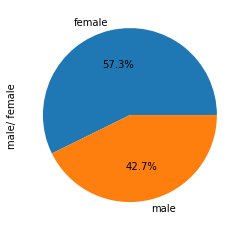

In [7]:
heart_diseases['male/female'].value_counts().plot.pie(label="male/ female",autopct='%1.1f%%')

##### Study the differences between males and females:


In [8]:
heart_diseases_male = heart_diseases[heart_diseases.male==1].copy()
heart_diseases_male.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male/female,Chance of getting sick
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,male,No
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,male,No


In [9]:
heart_diseases_female = heart_diseases[heart_diseases.male==0].copy()
heart_diseases_female.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male/female,Chance of getting sick
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,female,No
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,female,Yes


### Who smokes more- Men or women?

Text(0.5, 0, 'Male/Female')

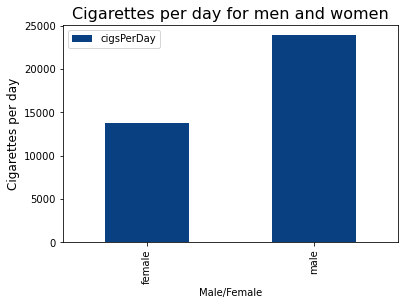

In [10]:
ax=heart_diseases.pivot_table("cigsPerDay","male/female",aggfunc=sum).plot(kind="bar",colormap="GnBu_r")
ax.set_title('Cigarettes per day for men and women',fontsize=16)
ax.set_ylabel("Cigarettes per day",fontsize=12)
ax.set_xlabel("Male/Female")

#### First conclusion.

- We can learn an important lesson - men smoke more than women, this is despite the fact that there are almost 15% more women in the data and that reinforces our claim about who smokes more.


### How does the amount of cigarettes that people smoke during their lives varies with time?
- Since the most abudent data is about 40 and 50 years old individuals, we separated this groups into two such that the groups are from 30-50 and 50-70 years old. This will maintain a balanced size groups.

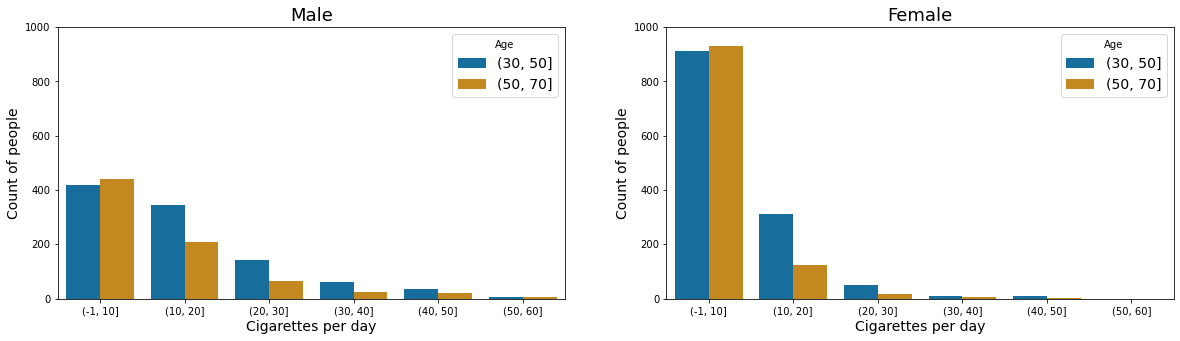

In [12]:
fig,axes = plt.subplots(figsize=(20,5),ncols=2)
McigsPerDay= pd.cut(heart_diseases_male["cigsPerDay"],[-1,10,20,30,40,50,60])
FcigsPerDay= pd.cut(heart_diseases_female["cigsPerDay"],[-1,10,20,30,40,50,60])

Mage = pd.cut(heart_diseases_male['age'], [30,50,70])
Fage = pd.cut(heart_diseases_female['age'], [30,50,70])

sns.countplot(ax=axes[0],data= heart_diseases_male,x=McigsPerDay,hue=Mage,palette="colorblind")
axes[0].set_title('Male',fontsize=18)
axes[0].legend(loc="upper right",title="Age",fontsize=14)
axes[0].set_ylabel("Count of people",fontsize=14)
axes[0].set_xlabel("Cigarettes per day",fontsize=14)
axes[0].set(ylim=(-1,1000))
sns.countplot(ax=axes[1],data=heart_diseases_female,x=FcigsPerDay,hue=Fage,palette="colorblind")
axes[1].set_title('Female',fontsize=18)
axes[1].legend(loc="upper right",title="Age",fontsize=14)
axes[1].set_ylabel("Count of people",fontsize=14)
axes[1].set_xlabel("Cigarettes per day",fontsize=14)
axes[1].set(ylim=(-1,1000))
plt.show()


#### Second conclusion.

- Although older individuals smoke more 1-10 cigerettes per day, overall they smoke less than younger individuals does. In addition, it can be seen that in the category of 1-10 cigerette per day women smoke more than double the amount that men does.      

- In order to rule out confounding effects as a result of poor health that is more likely at older age, we only use data of 30-40 years individuals. 

In [13]:
age=pd.cut(heart_diseases_female['age'],[30,40])
heart_diseases_female.pivot_table("cigsPerDay",["male/female",age],"Chance of getting sick")

,Chance of getting sick,No,Yes
male/female,age,,
female,"(30, 40]",7.835052,14.6875


In [14]:
age2=pd.cut(heart_diseases_male['age'],[30,40])
heart_diseases_male.pivot_table("cigsPerDay",["male/female",age2],"Chance of getting sick")

,Chance of getting sick,No,Yes
male/female,age,,
male,"(30, 40]",15.07541,16.952381



- For women to be classify as high risk for heart diseases they need to smoke double the amount that men do. This raise the question of the importance of gender effect on chances to suffer from heart diseases.


#### Who has a higher risk of developing heart disease in the next ten years, men or women?


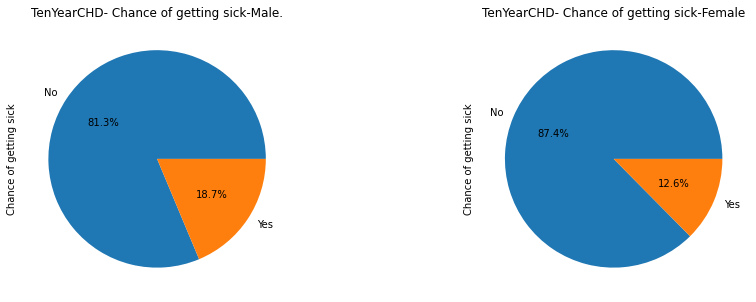

In [15]:
fig,axes = plt.subplots(figsize=(15,5),ncols=2)

heart_diseases_male['Chance of getting sick'].value_counts().plot.pie(ax=axes[0],autopct="%1.1f%%", title = "TenYearCHD- Chance of getting sick-Male." )
heart_diseases_female['Chance of getting sick'].value_counts().plot.pie(ax=axes[1],autopct="%1.1f%%", title ="TenYearCHD- Chance of getting sick-Female")
plt.show()

#### Third conclusion.

- It can be seen that men have a higher risk of developing heart disease in the next ten years yet further research is needed to examine this issue.

#### We want to see the distribution of cholesterol and glucose values among men and women, in order to better learn about the population in the data..

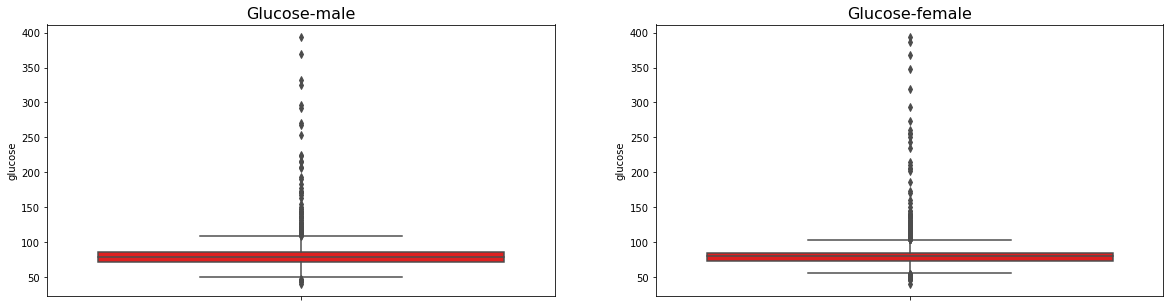

In [16]:
fig,axes= plt.subplots(figsize=(20,5),ncols=2)
sns.boxplot(ax=axes[0],y='glucose',data=heart_diseases_male,color='red')
axes[0].set_title('Glucose-male',fontsize=16)
sns.boxplot(ax=axes[1],y='glucose',data=heart_diseases_female,color='red')
axes[1].set_title('Glucose-female',fontsize=16)
plt.show()

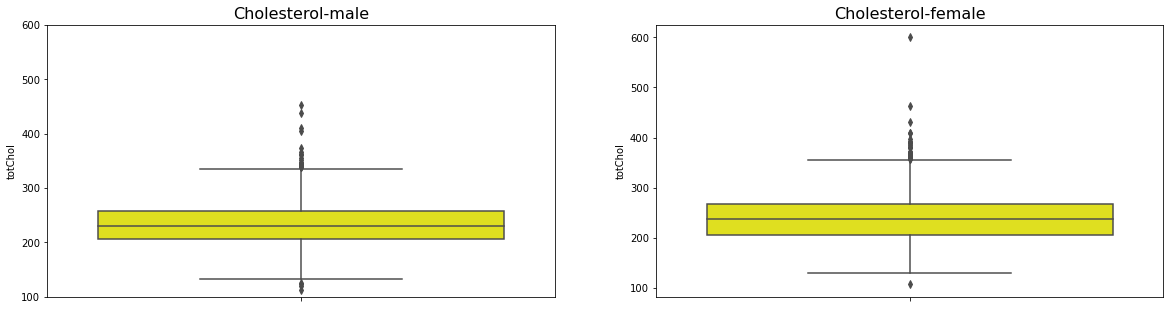

In [17]:
fig,axes= plt.subplots(figsize=(20,5),ncols=2)
sns.boxplot(ax=axes[0],y='totChol',data=heart_diseases_male,color='yellow')
axes[0].set_title('Cholesterol-male',fontsize=16)
axes[0].set(ylim=(100,600))
sns.boxplot(ax=axes[1],y='totChol',data=heart_diseases_female,color='yellow')
axes[1].set_title('Cholesterol-female',fontsize=16)
plt.show()

- We can see that the distribution of the tested values is a bit unusual since the average values of Glucose is normal, however there are a lot of outliers.

- Although the presented Cholesterol levels seems slightly high, since the subjects are American citizens who suffer from 6% higher Cholesterol than Western countries citizens, these values are normal.

#### Fourth conclusion.

- This finding leads us to another conclusion which can be taken to other disease related research- most of the population is healthy. Although values such as Cholesterol and Glucose  can be abnormal it does not necessarily mean individual are sick since there can still be many other variables that affect the chances of getting sick.  This conclusion makes it very difficult to predict who would be sick and who would not be sick.

#### Because of the previous conclusion we raised:
- Using several models we first tried to predict who would be sick and who would not be sick. We find that the accuracy of the models is high, about 90% prevision overall. However no model was able to predict an individuals who has a risk of suffering a heart disease.
- We then realized that no model can predict patients because there are almost no patients (something we mentioned earlier) thus the model will constantly predict that the patient are healthy, therefore the model is accurate 90% of the times.
- We therefore cut from our data 82% of healthy the patients in order to create a 50/50 sensible ratio of patients vs healthy.

<div>
<img src="https://raw.githubusercontent.com/YogevLD/DS_test/main/fig/heart_disease3.jpg" style="width:350px;height;150px"/>
</div>


##### This is the ratio of patients vs healthy before we cut the data.

In [18]:
pd.DataFrame(heart_diseases['TenYearCHD'].value_counts())

,TenYearCHD
0,3505
1,628


##### Here we cut 82% of the healthy patients and redefine our data.

In [19]:
drop_idx = heart_diseases[heart_diseases['TenYearCHD']==0].sample(frac=0.82,random_state=6).index
heart_diseases_new=heart_diseases.drop(drop_idx).copy()

##### This is the ratio of patients vs healthy after we cut the data.

In [20]:
pd.DataFrame(heart_diseases_new['TenYearCHD'].value_counts())

,TenYearCHD
0,631
1,628


##### Define the features and target of the model.
##### Split the data into 30% test and 70% training.

In [21]:
features = ['male','age', 'totChol', 'BPMeds','glucose','cigsPerDay','diabetes','sysBP','diaBP']
X = heart_diseases_new[features]
y = heart_diseases_new['TenYearCHD']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=23) 

- Choose a random forest model.
- Fit the model.
- Make prediction.
- Check the accuracy of the model.

In [22]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(max_depth=10,n_estimators=1000,min_samples_leaf=20,random_state=23, criterion='gini')
random_f.fit(X_train, y_train)
predrf = random_f.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
print("The accuracy of our model:",acc,"!")

The accuracy of our model: 0.6851851851851852 !


- Check by matrix In some cases we were right and in some cases we were wrong.

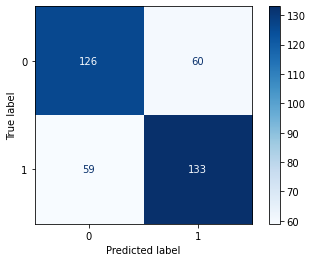

In [23]:
sk.metrics.plot_confusion_matrix(random_f, X_test, y_test, cmap=plt.cm.Blues)

- We can see that our accuracy has really decreased, but we have been able to predict a significant percentage of patients. 
- The percentage of patients since we were able to predict that they have a chance of getting sick is of great importance! These are people who now know they need to change their lifestyle / seek medical attention that can save their lives.